In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
df_train = pd.read_csv('datasets/train_features.csv')
df_test = pd.read_csv('datasets/test_features.csv')

In [3]:
df_test.shape, df_train.shape

((878, 32), (2051, 33))

In [4]:
df_train.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'SalePrice', 'total bath',
       'total sf', 'age'],
      dtype='object')

Text(0.5, 1.0, 'House Age vs Sale Price')

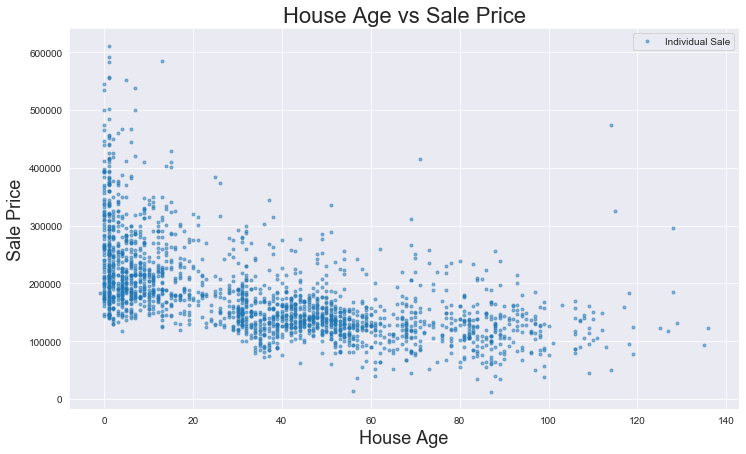

In [62]:
plt.figure(figsize=(12,7))
plt.xlabel("House Age", fontsize=18)
plt.ylabel("Sale Price", fontsize=18)
plt.plot(df_train.age, df_train.SalePrice,'.', alpha=0.5, label = 'Individual Sale')
plt.legend()
plt.title("House Age vs Sale Price", fontsize=22)

Text(0.5, 1.0, 'Distribution of Housing Prices')

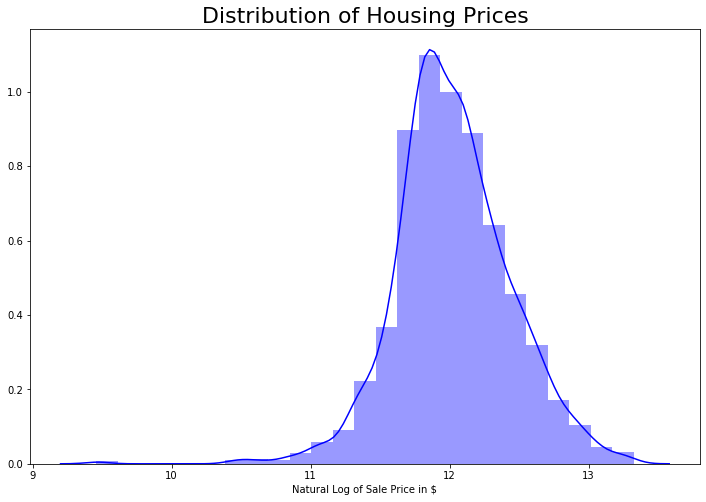

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(df_train.SalePrice), bins = 25, color='blue')
plt.xlabel("Natural Log of Sale Price in $")
plt.title("Distribution of Housing Prices", fontsize=22)


Text(0.5, 1.0, 'Housing Prices')

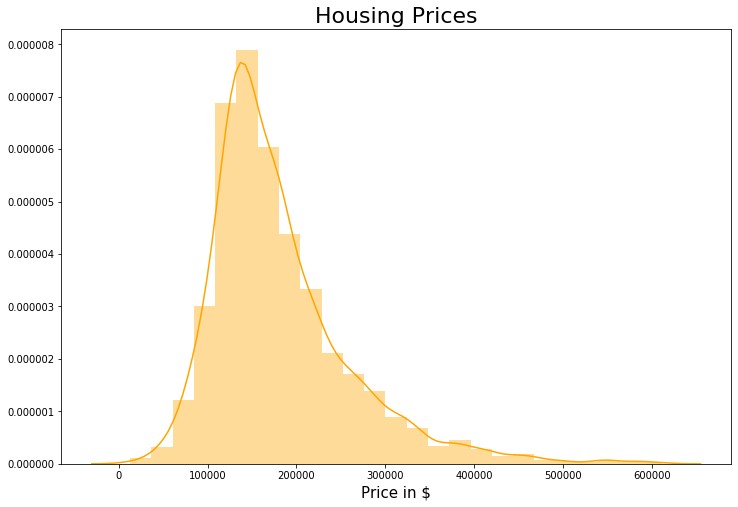

In [18]:
plt.figure(figsize=(12,8))
sns.distplot((df_train.SalePrice), bins = 25, color='orange')
plt.xlabel("Price in $", fontsize=15)
plt.title("Housing Prices", fontsize=22)

Text(0.5, 1.0, 'Log of Housing Prices')

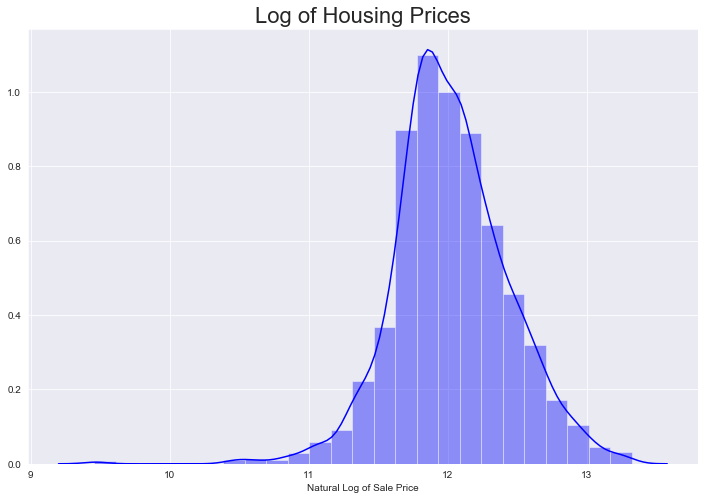

In [50]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
target = np.log(df_train['SalePrice'])
sns.distplot(target, bins = 25, color='blue')
plt.xlabel("Natural Log of Sale Price")
plt.title("Log of Housing Prices", fontsize=22)

In [28]:
df_train.groupby('Functional')['SalePrice'].mean()

Functional
Maj1    163106.166667
Maj2     87157.714286
Min1    154429.761905
Min2    150424.571429
Mod     148108.724138
Sal      31550.000000
Sev      95750.000000
Typ     183954.749347
Name: SalePrice, dtype: float64

In [30]:
found_func = pd.get_dummies(data=df_train, columns=['Foundation', 'Functional'], drop_first=True)

In [32]:
found_func_test = pd.get_dummies(data=df_test, columns=['Foundation', 'Functional'], drop_first=True)

In [33]:
found_func

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ
0,109,69,13517,Sawyer,6,1976,2005,HdBoard,Plywood,4,...,0,0,0,0,0,0,0,0,0,1
1,544,43,11492,SawyerW,7,1996,1997,VinylSd,VinylSd,4,...,0,0,0,0,0,0,0,0,0,1
2,153,68,7922,NAmes,5,1953,2007,VinylSd,VinylSd,3,...,0,0,0,0,0,0,0,0,0,1
3,318,73,9802,Timber,5,2006,2007,VinylSd,VinylSd,3,...,0,0,0,0,0,0,0,0,0,1
4,255,82,14235,SawyerW,6,1900,1993,Wd Sdng,Plywood,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,79,11449,Timber,8,2007,2007,VinylSd,VinylSd,4,...,0,0,0,0,0,0,0,0,0,1
2047,785,69,12342,Edwards,4,1940,1950,VinylSd,VinylSd,3,...,0,0,0,0,0,0,0,0,0,1
2048,916,57,7558,Crawfor,6,1928,1950,BrkFace,Stone,3,...,0,0,0,0,0,0,0,0,0,1
2049,639,80,10400,NAmes,4,1956,1956,Plywood,Plywood,3,...,0,0,0,0,0,0,0,0,0,1


In [34]:
########  making a model and then training the model 
features = [col for col in found_func._get_numeric_data().columns if col != 'SalePrice']
X_train = found_func[features]
y_train = found_func['SalePrice']

####instatiatie model
model = LinearRegression()
###fit model to train data
model.fit(X_train, y_train)
# check the score on the training data
model.score(X_train, y_train)

0.8303190243522235

In [42]:
found_func_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 878 non-null    int64  
 1   Lot Frontage       878 non-null    int64  
 2   Lot Area           878 non-null    int64  
 3   Neighborhood       878 non-null    object 
 4   Overall Qual       878 non-null    int64  
 5   Year Built         878 non-null    int64  
 6   Year Remod/Add     878 non-null    int64  
 7   Exterior 1st       878 non-null    object 
 8   Exterior 2nd       878 non-null    object 
 9   Exter Qual         878 non-null    int64  
 10  Bsmt Qual          878 non-null    int64  
 11  Bsmt Cond          878 non-null    int64  
 12  Total Bsmt SF      878 non-null    int64  
 13  Heating QC         878 non-null    int64  
 14  Central Air        878 non-null    int64  
 15  Gr Liv Area        878 non-null    int64  
 16  Kitchen Qual       878 non

In [40]:
found_func_test.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Gr Liv Area', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Paved Drive', 'Mo Sold', 'Yr Sold',
       'total bath', 'total sf', 'age', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Typ'],
      dtype='object')